Verificando os dados

In [33]:
import pandas as pd

file_path = 'PDA_PNME_2017_2018_2019.csv'

df = pd.read_csv(file_path, delimiter=';', skipinitialspace=True)

df.head()

C:\Users\xrafa\AppData\Local\Temp\ipykernel_18992\240098091.py:5: DtypeWarning: Columns (0,1,2,3,5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, delimiter=';', skipinitialspace=True)


,NOME_UF,NOME_MUNICIPIO,ESFERA_GOV_ESCOLA,LOCALIZACAO_ESCOLA,INEP_ESCOLA,NOME_ESCOLA,QUANT_ALUNADO,VALOR_RECEBIDO
0,RO,PORTO VELHO,ESTADUAL,Urbana,11000708.0,EEEFM CAP CLAUDIO MANOEL DA COSTA,60.0,"R$ 4.120,00"
1,RO,PORTO VELHO,MUNICIPAL,Rural,11000864.0,EMEF DEIGMAR MORAES DE SOUZA,200.0,"R$ 54.840,00"
2,RO,PORTO VELHO,ESTADUAL,Urbana,11001160.0,EEEF HEITOR VILLA LOBOS,60.0,"R$ 8.556,00"
3,RO,PORTO VELHO,ESTADUAL,Urbana,11001496.0,EEEFM MARCOS DE BARROS FREIRE,532.0,"R$ 18.492,00"
4,RO,PORTO VELHO,ESTADUAL,Urbana,11002255.0,EEEFM SAO LUIZ,60.0,"R$ 12.420,00"


Separando valores recebidos por uf e por quantidade de alunos de cada uf

<>:11: SyntaxWarning: invalid escape sequence '\$'
<>:11: SyntaxWarning: invalid escape sequence '\.'
<>:11: SyntaxWarning: invalid escape sequence '\$'
<>:11: SyntaxWarning: invalid escape sequence '\.'
C:\Users\xrafa\AppData\Local\Temp\ipykernel_18992\1047579778.py:11: SyntaxWarning: invalid escape sequence '\$'
  df['VALOR_RECEBIDO'] = df['VALOR_RECEBIDO'].replace({'R\$': '', ',': '.', '\.': ''}, regex=True).astype(float)
C:\Users\xrafa\AppData\Local\Temp\ipykernel_18992\1047579778.py:11: SyntaxWarning: invalid escape sequence '\.'
  df['VALOR_RECEBIDO'] = df['VALOR_RECEBIDO'].replace({'R\$': '', ',': '.', '\.': ''}, regex=True).astype(float)
C:\Users\xrafa\AppData\Local\Temp\ipykernel_18992\1047579778.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='NOME_UF', y='VALOR_RECEBIDO', data=df, ci=None, estimator=sum)


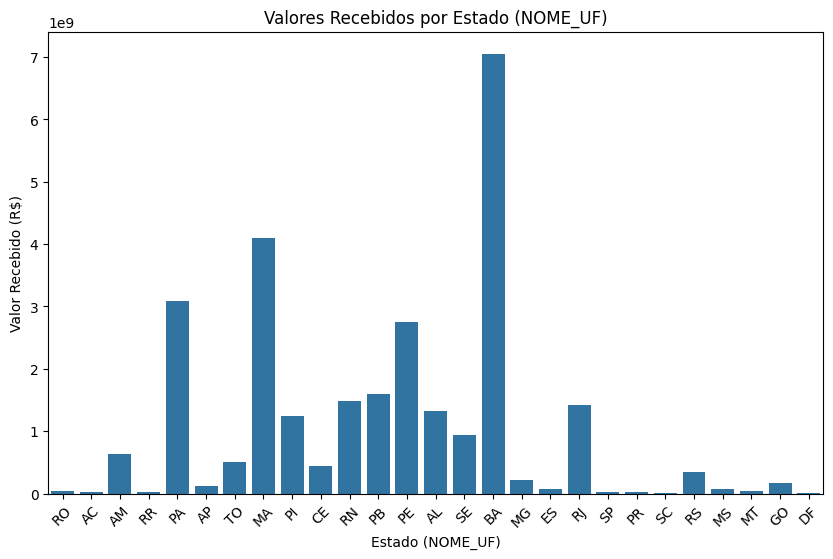

C:\Users\xrafa\AppData\Local\Temp\ipykernel_18992\1047579778.py:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='QUANT_ALUNADO', y='VALOR_RECEBIDO', hue='NOME_UF', data=df, ci=None, estimator=sum)


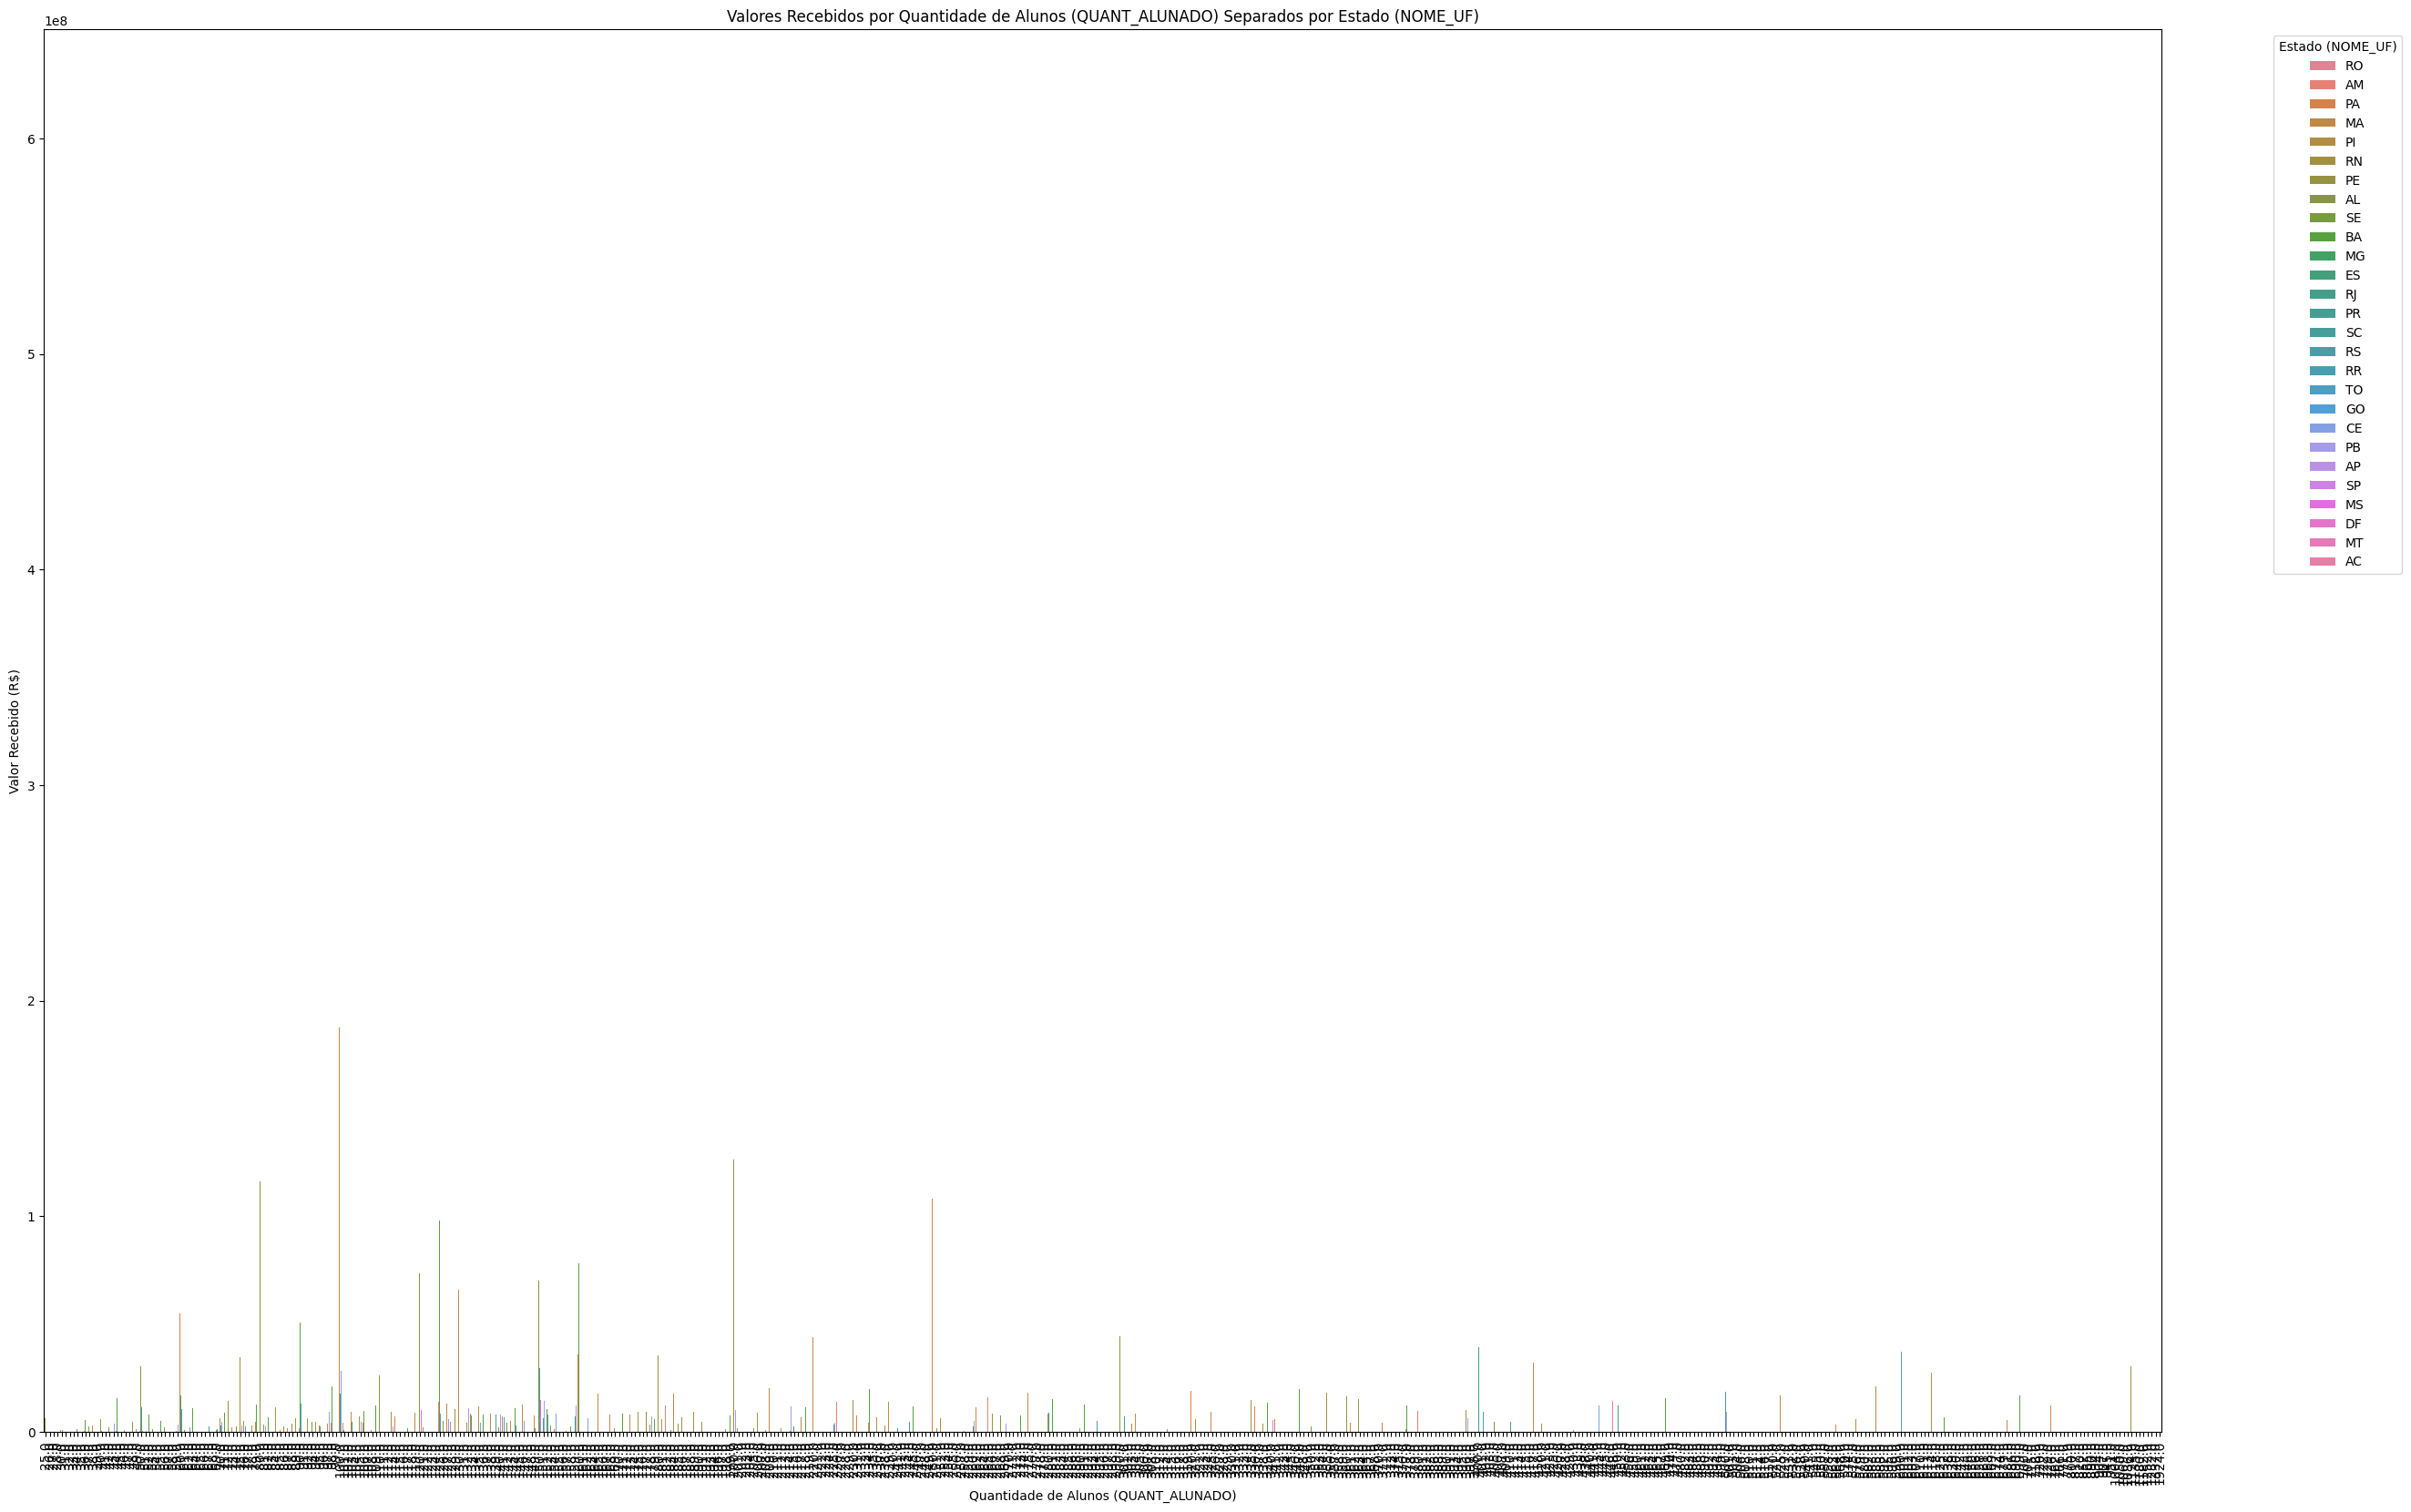

                VALOR_RECEBIDO  QUANT_ALUNADO
VALOR_RECEBIDO        1.000000       0.629271
QUANT_ALUNADO         0.629271       1.000000


In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'PDA_PNME_2017_2018_2019.csv'

df = pd.read_csv(file_path, delimiter=';', skipinitialspace=True, low_memory=False)

df.columns = df.columns.str.strip()

df['VALOR_RECEBIDO'] = df['VALOR_RECEBIDO'].replace({'R\$': '', ',': '.', '\.': ''}, regex=True).astype(float)

correlacao = df[['VALOR_RECEBIDO', 'QUANT_ALUNADO']].corr()

plt.figure(figsize=(10, 6))
sns.barplot(x='NOME_UF', y='VALOR_RECEBIDO', data=df, ci=None, estimator=sum)
plt.title('Valores Recebidos por Estado (NOME_UF)')
plt.xlabel('Estado (NOME_UF)')
plt.ylabel('Valor Recebido (R$)')
plt.xticks(rotation=45)
plt.show()

print(correlacao)

Valores recebidos por quantidade de alunos separados por estado

In [ ]:
plt.figure(figsize=(40, 30))
sns.barplot(x='QUANT_ALUNADO', y='VALOR_RECEBIDO', hue='NOME_UF', data=df, ci=None, estimator=sum)
plt.title('Valores Recebidos por Quantidade de Alunos (QUANT_ALUNADO) Separados por Estado (NOME_UF)')
plt.xlabel('Quantidade de Alunos (QUANT_ALUNADO)')
plt.ylabel('Valor Recebido (R$)')
plt.xticks(rotation=90)
plt.legend(title='Estado (NOME_UF)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Distribuição da Quantidade de Alunos por Localização (Urbana vs Rural)

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='LOCALIZACAO_ESCOLA', y='QUANT_ALUNADO', data=df)
plt.title('Distribuição da Quantidade de Alunos por Localização')
plt.xlabel('Localização da Escola')
plt.ylabel('Quantidade de Alunos')
plt.show()

Distribuição dos Valores Recebidos por Esfera de Governo

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='ESFERA_GOV_ESCOLA', y='VALOR_RECEBIDO', data=df)
plt.title('Distribuição dos Valores Recebidos por Esfera de Governo')
plt.xlabel('Esfera de Governo')
plt.ylabel('Valor Recebido (R$)')
plt.show()

Quantidade de Escolas por Estado

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='NOME_UF', data=df, order=df['NOME_UF'].value_counts().index)
plt.title('Quantidade de Escolas por Estado')
plt.xlabel('Estado (NOME_UF)')
plt.ylabel('Quantidade de Escolas')
plt.xticks(rotation=45)
plt.show()